* Análise do perfil dos foliões: pode-se explorar a faixa etária, o gênero, o estado civil e a renda dos entrevistados para entender melhor quem são os foliões que participam do Carnaval de Belo Horizonte.

* ~~Comportamento dos visitantes: pode-se analisar o comportamento dos visitantes em relação aos moradores da cidade, incluindo informações sobre a duração da estadia, gastos, atividades realizadas e motivações para participar do Carnaval de Belo Horizonte.~~ **Não temos dados suficiente para esta **

* ~~Preferências musicais: pode-se explorar quais são os gêneros musicais mais populares entre os foliões, bem como as diferenças nas preferências musicais entre residentes e visitantes.~~ **Não temos dados suficiente para esta **

* ~~Gastos dos foliões: pode-se analisar quanto dinheiro os foliões gastaram no Carnaval de Belo Horizonte, bem como as principais categorias de gastos (como hospedagem, alimentação e transporte interno).~~ **Não temos dados suficiente para esta **

* Avaliação da experiência: pode-se analisar as avaliações dos foliões sobre a experiência do Carnaval de Belo Horizonte, incluindo aspectos como banheiros, segurança, preços, entre outros.

* ~~Evolução do Carnaval: pode-se comparar os resultados desta pesquisa com dados de pesquisas anteriores para entender como o Carnaval de Belo Horizonte tem evoluído ao longo dos anos em termos de perfil dos foliões, comportamento, gastos, preferências musicais, entre outros aspectos.~~ **Não temos dados suficiente para esta **

* Algumas questões foram realizadas apenas para os idivíduos visitantes pois buscam auferir o comportamento deste durante o carnaval no município. Para as observações de moradores, essas questões retornam NA como valor.

  * Filtrar por visitantes e rever falores que antes pensava que eram nulos por falta de dados

# Visão Geral dos Dados

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab/Projetos/HACKATON/dataset_carnaval_20181.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1645 entries, 0 to 1644
Data columns (total 55 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   morador                    1645 non-null   object 
 1   numerocontrole             1645 non-null   int64  
 2   Bloco                      1645 non-null   object 
 3   DT_VISITA                  1645 non-null   object 
 4   DT_TERMINO                 1645 non-null   object 
 5   TEMPO_TOTAL_ENTREV         1645 non-null   object 
 6   Idade                      1645 non-null   int64  
 7   Pais                       1645 non-null   object 
 8   Estado                     1640 non-null   object 
 9   Cidade                     1640 non-null   object 
 10  Bairro_BH                  1135 non-null   object 
 11  Regiao_BH                  1135 non-null   object 
 12  T_pernoite                 228 non-null    object 
 13  T_qtpernoite               210 non-null    float

In [4]:
# function to print the total percentage of the missing values.
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [5]:
missing_percentage(df)

,Total,Percent
T_Hospedagem,1605,98.0
T_outromoivo,1596,97.0
Motivo,1582,96.0
Ingressos,1543,94.0
Motivo_nao,1539,94.0
T_Atrativos_passeios,1464,89.0
T_qtpernoite,1435,87.0
T_hospedagem,1435,87.0
T_transp,1434,87.0
T_pernoite,1417,86.0


In [6]:
# Aqui eu removo todas as colunas com mais de 35% das colunas com valores ausentes

# Definir o limite máximo de valores nulos
max_null_pct = 35

# Obter a porcentagem de valores nulos em cada coluna
null_pct = df.isna().sum() / len(df) * 100

# Selecionar as colunas que têm menos de max_null_pct de valores nulos
selected_cols = null_pct[null_pct <= max_null_pct].index

# Criar um novo DataFrame com as colunas selecionadas
new_df = df[selected_cols]

# Imprimir o DataFrame resultante
missing_percentage(new_df)

,Total,Percent
Regiao_BH,510,31.0
Bairro_BH,510,31.0
Transporte_interno,454,28.0
Evolucao,434,26.0
Alimentacao,86,5.0
Total,23,1.0
Gasto_total,22,1.0
Estado,5,0.0
Cidade,5,0.0
Qtd_pessoas_gasto,1,0.0


## 1. Análise do perfil dos foliões: pode-se explorar a faixa etária, o gênero, o estado civil e a renda dos entrevistados para entender melhor quem são os foliões que participam do Carnaval de Belo Horizonte.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar apenas as colunas relevantes
df_profile = new_df[['morador', 'Idade', 'Genero', 'Estado_civil', 'Faixa_renda']].copy()

# Calcular a porcentagem de residentes e visitantes
percent_residentes = df['morador'].value_counts(normalize=True)[0]
percent_visitantes = df['morador'].value_counts(normalize=True)[1]

# Calcular a distribuição de idade dos foliões
age_bins = [0, 18, 25, 35, 45, 55, 65, 100]
age_labels = ['<18', '18-25', '25-35', '35-45', '45-55', '55-65', '65+']
df_profile['Faixa_etaria'] = pd.cut(df_profile['Idade'], bins=age_bins, labels=age_labels)
df_age = df_profile.groupby('Faixa_etaria').count()

# Calcular a distribuição de gênero dos foliões
df_gender = df_profile.groupby('Genero').count()

# Calcular a distribuição de estado civil dos foliões
df_civil_status = df_profile.groupby('Estado_civil').count()

# Calcular a distribuição de renda dos foliões
df_income = df_profile.groupby('Faixa_renda').count()

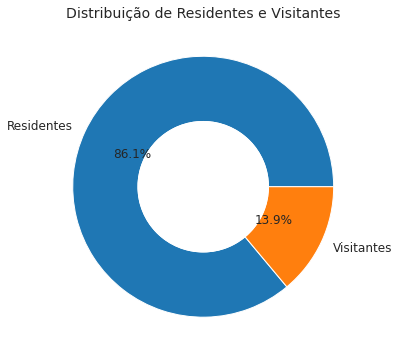

In [11]:
# Criar DataFrame para o gráfico de pizza
df_res_vis = pd.DataFrame({'Tipo': ['Residentes', 'Visitantes'], 'Porcentagem': [percent_residentes, percent_visitantes]})

# Configurar estilo Seaborn
sns.set_style('whitegrid')

# Criar gráfico de pizza
plt.figure(figsize=(6,6))
plt.pie(df_res_vis['Porcentagem'], labels=df_res_vis['Tipo'], autopct='%1.1f%%', wedgeprops=dict(width=0.5), textprops=dict(size=12))
plt.title('Distribuição de Residentes e Visitantes', fontsize=14)

# Adicionar círculo branco no centro do gráfico
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()


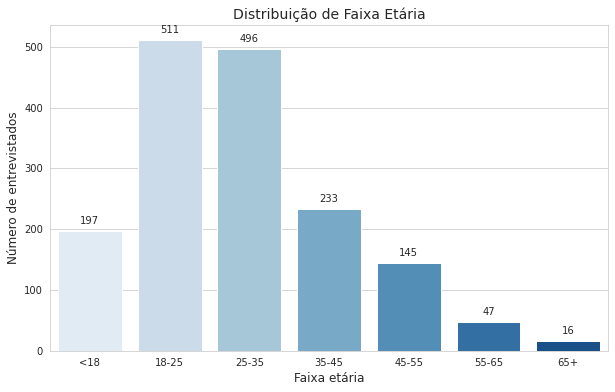

In [12]:
# Configurar estilo Seaborn
sns.set_style('whitegrid')

# Criar gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(x=df_age.index, y='Idade', data=df_age, palette='Blues')
plt.title('Distribuição de Faixa Etária', fontsize=14)
plt.xlabel('Faixa etária', fontsize=12)
plt.ylabel('Número de entrevistados', fontsize=12)

# Adicionar valores nas barras
for p in plt.gca().patches:
    plt.gca().annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


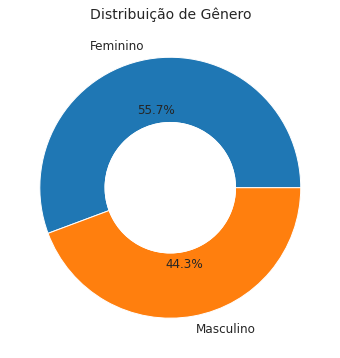

In [13]:
# Configurar estilo Seaborn
sns.set_style('whitegrid')

# Criar gráfico de pizza
plt.figure(figsize=(6,6))
plt.pie(df_gender['Idade'], labels=df_gender.index, autopct='%1.1f%%', wedgeprops=dict(width=0.5), textprops=dict(size=12), colors=['#1f77b4', '#ff7f0e'])
plt.title('Distribuição de Gênero', fontsize=14)

# Adicionar círculo branco no centro do gráfico
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()


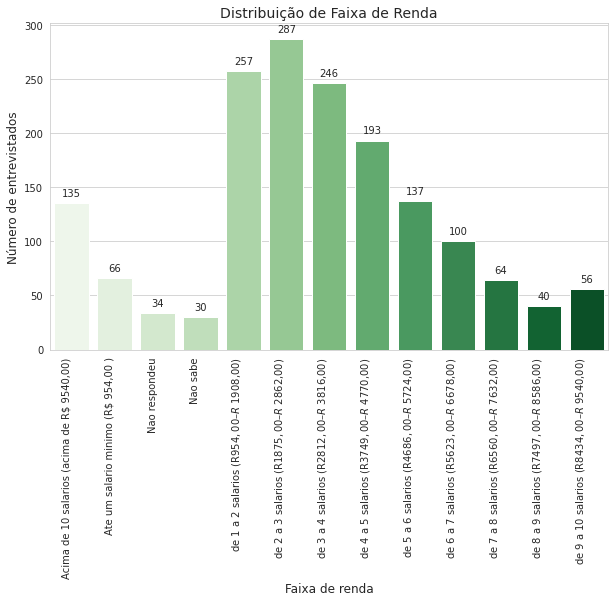

In [14]:
import seaborn as sns

# Configurar estilo Seaborn
sns.set_style('whitegrid')

# Criar gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(x=df_income.index, y='Idade', data=df_income, palette='Greens')
plt.title('Distribuição de Faixa de Renda', fontsize=14)
plt.xlabel('Faixa de renda', fontsize=12)
plt.ylabel('Número de entrevistados', fontsize=12)


# Adicionar valores nas barras
for p in plt.gca().patches:
    
    plt.gca().annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# Rotacionar o eixo X em 45 graus
plt.gca().set_xticklabels(df_income.index, rotation=90, ha='right')

plt.show()


## 2. Avaliação da experiência: pode-se analisar as avaliações dos foliões sobre a experiência do Carnaval de Belo Horizonte, incluindo aspectos como banheiros, segurança, preços, entre outros.

Essas avaliações podem ser utilizadas para identificar os pontos fortes e fracos do Carnaval de Belo Horizonte e ajudar a direcionar os esforços para aprimorar a qualidade do evento. ~~Além disso, as avaliações também podem ser comparadas ao longo do tempo para avaliar se houve melhorias ou declínios na experiência geral do Carnaval.~~ **Não temos dados de outros anos**

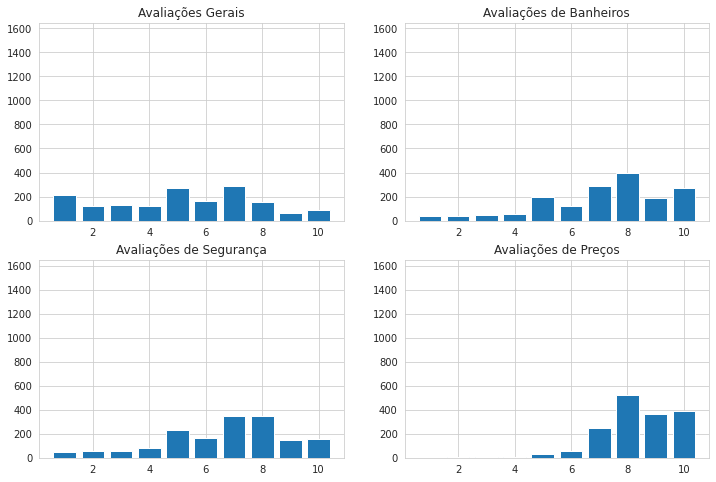

In [15]:
import pandas as pd

# to numeric
df['Aval_geral'] = pd.to_numeric(df['Aval_geral'], errors='coerce')
df['Aval_banheiros'] = pd.to_numeric(df['Aval_banheiros'], errors='coerce')
df['Aval_seguranca'] = pd.to_numeric(df['Aval_seguranca'], errors='coerce')
df['Aval_precos'] = pd.to_numeric(df['Aval_precos'], errors='coerce')

# conta o número de ocorrências de cada avaliação
avaliacoes_gerais = df['Aval_geral'].value_counts().sort_index()
avaliacoes_banheiros = df['Aval_banheiros'].value_counts().sort_index()
avaliacoes_seguranca = df['Aval_seguranca'].value_counts().sort_index()
avaliacoes_precos = df['Aval_precos'].value_counts().sort_index()

# cria gráficos de barras das avaliações
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs[0, 0].bar(avaliacoes_gerais.index, avaliacoes_gerais.values)
axs[0, 0].set_ylim([0, len(df)])
axs[0, 0].set_title('Avaliações Gerais')
axs[0, 1].bar(avaliacoes_banheiros.index, avaliacoes_banheiros.values)
axs[0, 1].set_ylim([0, len(df)])
axs[0, 1].set_title('Avaliações de Banheiros')
axs[1, 0].bar(avaliacoes_seguranca.index, avaliacoes_seguranca.values)
axs[1, 0].set_ylim([0, len(df)])
axs[1, 0].set_title('Avaliações de Segurança')
axs[1, 1].bar(avaliacoes_precos.index, avaliacoes_precos.values)
axs[1, 1].set_ylim([0, len(df)])
axs[1, 1].set_title('Avaliações de Preços')
plt.show()

## Visitantes

In [34]:
import numpy as np

In [47]:
visitors_df = df[df['morador'] == 'Visitantes'].copy()

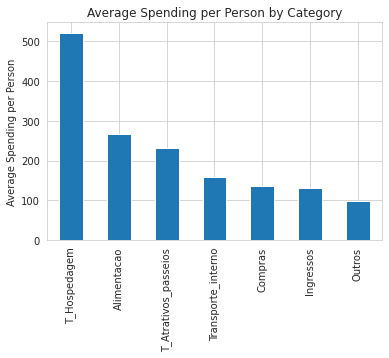

In [50]:
# Convert spending columns and 'Qtd_pessoas_gasto' column to numeric values
spending_columns = [
    'T_Hospedagem', 'Alimentacao', 'T_Atrativos_passeios',
    'Transporte_interno', 'Compras', 'Ingressos', 'Outros'
]

for col in spending_columns + ['Qtd_pessoas_gasto']:
    visitors_df[col] = pd.to_numeric(visitors_df[col], errors='coerce')

# Divide each spending column by the 'Qtd_pessoas_gasto' column to get spending per person
spending_per_person = visitors_df[spending_columns].div(visitors_df['Qtd_pessoas_gasto'], axis=0)

average_spending_per_person = spending_per_person.mean()

average_spending_per_person.plot(kind='bar')
plt.ylabel('Average Spending per Person')
plt.title('Average Spending per Person by Category')
plt.show()

### Demographic Analysis:

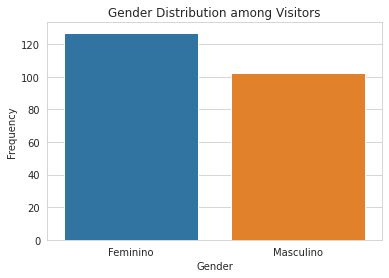

In [51]:
# Replace 'Genero' with 'Idade', 'Esclaridade', 'Estado_civil', or 'Faixa_renda' to analyze other demographic factors
sns.countplot(data=visitors_df, x='Genero')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Gender Distribution among Visitors')
plt.show()


### Geographic Analysis:

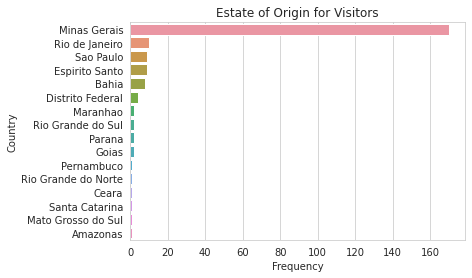

In [55]:
# Analyze state of origin
sns.countplot(data=visitors_df, y='Estado', order=visitors_df['Estado'].value_counts().index)
plt.xlabel('Frequency')
plt.ylabel('Country')
plt.title('Estate of Origin for Visitors')
plt.show()

### Duration and Participation:

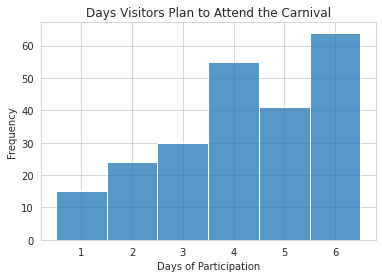

In [56]:
# Analyze the number of days visitors plan to attend the carnival
sns.histplot(data=visitors_df, x='Dias_carnaval', bins=np.arange(0.5, 10.5, 1), discrete=True)
plt.xlabel('Days of Participation')
plt.ylabel('Frequency')
plt.title('Days Visitors Plan to Attend the Carnival')
plt.show()


### Travel and Accommodation:


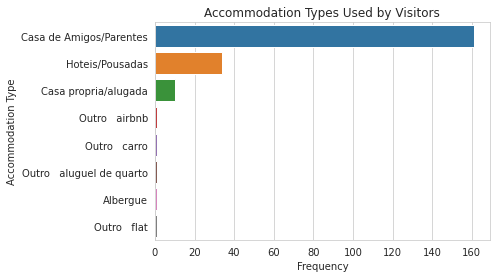

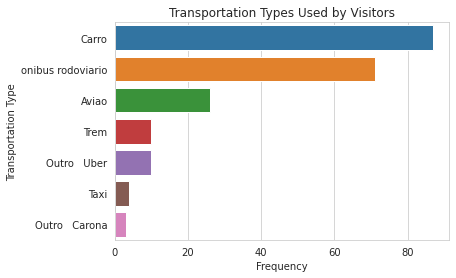

In [57]:
# Most common types of accommodation
sns.countplot(data=visitors_df, y='T_hospedagem', order=visitors_df['T_hospedagem'].value_counts().index)
plt.xlabel('Frequency')
plt.ylabel('Accommodation Type')
plt.title('Accommodation Types Used by Visitors')
plt.show()

# Most common types of transportation
sns.countplot(data=visitors_df, y='T_transp', order=visitors_df['T_transp'].value_counts().index)
plt.xlabel('Frequency')
plt.ylabel('Transportation Type')
plt.title('Transportation Types Used by Visitors')
plt.show()


### Spending Analysis:

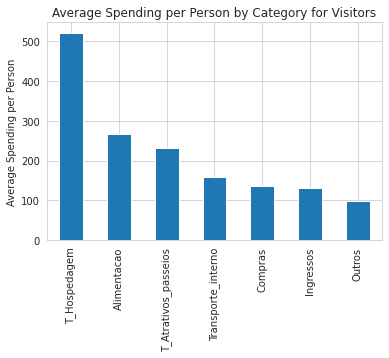

In [58]:
# Spending per person for each category
spending_per_person_visitors = visitors_df[spending_columns].div(visitors_df['Qtd_pessoas_gasto'], axis=0)
average_spending_per_person_visitors = spending_per_person_visitors.mean()

average_spending_per_person_visitors.plot(kind='bar')
plt.ylabel('Average Spending per Person')
plt.title('Average Spending per Person by Category for Visitors')
plt.show()


### Satisfaction and Future Attendance:

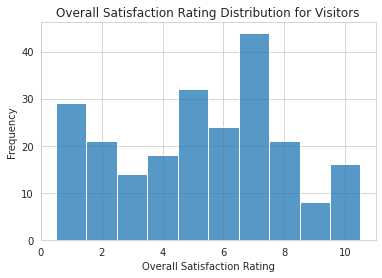

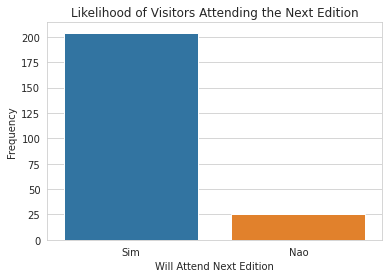

In [59]:
# Overall satisfaction ratings distribution for visitors
sns.histplot(data=visitors_df, x='Aval_geral', bins=np.arange(0.5, 6.5, 1), discrete=True)
plt.xlabel('Overall Satisfaction Rating')
plt.ylabel('Frequency')
plt.title('Overall Satisfaction Rating Distribution for Visitors')
plt.show()

# Analyze the likelihood of visitors attending the next edition
sns.countplot(data=visitors_df, x='Proxima_edicao')
plt.xlabel('Will Attend Next Edition')
plt.ylabel('Frequency')
plt.title('Likelihood of Visitors Attending the Next Edition')
plt.show()


## Outras Ideias

Pelo que foi analisado, mesmo que não tenhamos tantos dados, dá pra juntar a análise do perfil dos foliões com a avaliação da experiência do Carnaval de Belo Horizonte em um projeto só. Fazer isso pode ajudar a entender melhor quem são os foliões que curtem o evento e também saber quais são as coisas que eles mais curtem e as que precisam ser melhoradas na organização do Carnaval. A união dessas duas abordagens pode dar uma visão mais completa e aprofundada do evento.

Podemos também abordar estes dados:

In [16]:
df["Participou_anosanteriores"].value_counts()

Sim    1211
Nao     434
Name: Participou_anosanteriores, dtype: int64

In [17]:
df["Proxima_edicao"].value_counts()

Sim    1539
Nao     106
Name: Proxima_edicao, dtype: int64

In [18]:
df["Motivo_nao"].value_counts()

Viagem                                   45
Nao sabe                                 23
Falta de infraestrutura                  18
Outro   muito cheio                       2
Outro   cansou                            2
Outro   muita gente nova                  1
Outro   nao gostou                        1
Outro   fazendo intercambio               1
Outro   Decepçao                          1
Outro   Prefere ir a Praia                1
Outro   Mudança                           1
Outro   distancia                         1
Outro   Nao gosta muito de carnaval       1
Outro   anda demais comeca muito cedo     1
Outro   Prefere locais pequenos           1
Outro   Outro lugar                       1
Outro   porque fui roubada                1
Outro   prefere o interior do Estado      1
Outro   ruim                              1
Outro   nao gostei                        1
Outro   segurança nos bairros             1
Name: Motivo_nao, dtype: int64

In [19]:
df["Evolucao"].value_counts()

Melhorou                    934
Nem melhorou, nem piorou    214
Piorou                       63
Name: Evolucao, dtype: int64

In [20]:
df["Expectativas"].value_counts()

Atendeu plenamente          659
Superou                     625
Atendeu em parte            271
Indiferente                  46
Nao satisfez/decepcionou     44
Name: Expectativas, dtype: int64

In [60]:
# Aqui pode ser o Easter Egg

In [21]:
df["Principal_patrocinador"].value_counts()

Skol                663
Prefeitura          492
Nao sabe            281
Ambev                74
Populaçao            49
Amstel               27
Brahma               14
Outro                13
Belotur               8
Uber                  8
Blocos de rua         6
Catuaba selvagem      5
Cemig                 3
Ninguem               2
Name: Principal_patrocinador, dtype: int64

In [22]:
df["Esclaridade"].value_counts()

Ensino superior completo            513
Ensino medio completo               452
Ensino superior incompleto          358
Pos – Graduaçao – Especializaçao    114
Ensino medio incompleto              83
Ensino tecnico                       46
Pos – Graduaçao – Mestrado           28
Ensino fundamental incompleto        17
Pos – Graduaçao – Doutorado          16
Ensino fundamental completo          16
Nao respondeu                         2
Name: Esclaridade, dtype: int64